In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 

## Overview:

I am forecasting avocado prices using Facebook’s Prophet model. Prophet is an open-source forecasting tool developed by Facebook’s Core Data Science team. It is designed to handle time series data with strong seasonal effects and multiple seasons of historical data. Prophet uses an additive model to fit non-linear trends and incorporates yearly, weekly, and daily seasonality, along with the ability to account for holiday effects. More information is here: https://facebook.github.io/prophet/docs/quick_start.html#python-api.

The dataset for this project is sourced from Kagglehttps://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download..


## Problem Statement


The dataset contains weekly retail scan data from 2018, capturing both the retail volume (units) and price of Hass avocados. Retail scan data is collected directly from retailers’ cash registers, reflecting actual sales. The Average Price represents the cost per avocado, regardless of whether they are sold individually or in bags.

Key details about the dataset:

Date: The date of the observation
AveragePrice: The average price of a single avocado
Type: Conventional or organic
Year: The year of the observation
Region: The city or region of the observation
Total Volume: Total number of avocados sold
4046: Total number of avocados with PLU 4046 sold
4225: Total number of avocados with PLU 4225 sold
4770: Total number of avocados with PLU 4770 sold
The dataset only includes Hass avocados; other varieties, such as greenskins, are not represented.

Lets's start!

## Step-by-Step Walkthrough


### 1. Import Libraries


First it is necessary to import essential libraries: pandas and numpy for data manipulation, matplotlib and seaborn for visualizations, and Prophet for time series forecasting.

In [2]:
# import libraries 
import pandas as pd #for data manipulation using dataframes
import numpy as np #for data statistical analysis 
import matplotlib.pyplot as plt #for data visualisation
import random
import seaborn as sns
from prophet import Prophet


### 2. Load the Data

Let's load the avocado dataset into a DataFrame, which will contain historical data such as dates, prices, and volumes. The .head() function shows the first few rows for a quick look at the structure.

In [3]:
# dataframe creation for the dataset 
avocado_df = pd.read_csv('avocado.csv')

# Let's view the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Let's view the last elements in the training dataset
avocado_df.tail(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,0,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,1,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


### 3. Sort by Date

Time series data should always be in chronological order. Here, I sort the data by the 'Date' column to ensure that the subsequent analysis and forecasting happen correctly:

In [5]:
# Sort the DataFrame by the 'Date' column in ascending order to ensure chronological sequence
avocado_df = avocado_df.sort_values("Date")

### 4. Plot Historical Prices


Let's visualize the historical avocado prices over time to observe any visible trends or seasonal patterns. The plot should reveal price fluctuations over time, possibly indicating seasonal trends. Peaks and valleys might align with certain times of the year, reflecting demand changes. 

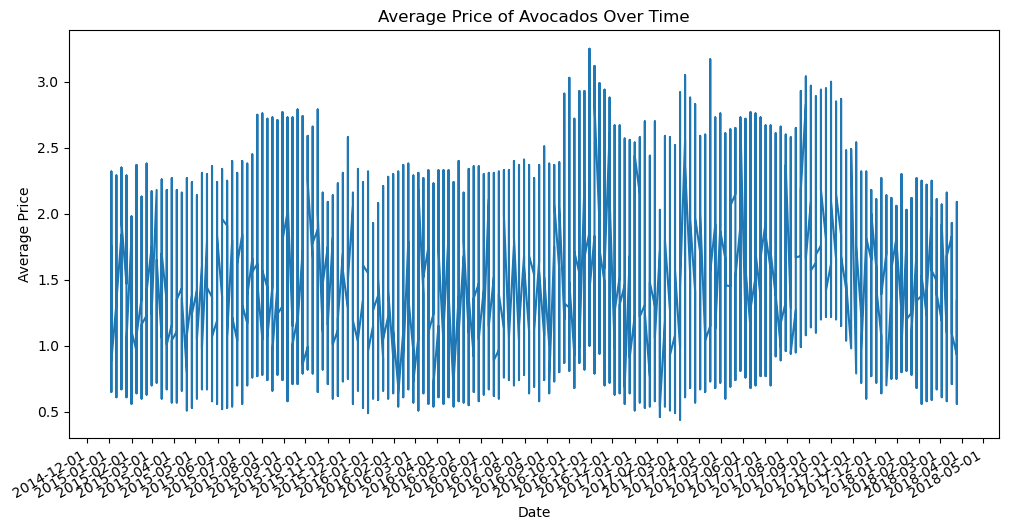

In [6]:
import matplotlib.dates as mdates

# Convert 'Date' column to datetime
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

plt.figure(figsize=(12,6))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  


# Rotate and format the x-axis labels
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados Over Time')

# Show the plot
plt.show()


From 2015 to 2017, avocado prices peaked in mid-year (summer) and early fall, reflecting high consumer demand during these months. Prices consistently dropped in January, likely due to reduced demand post-holidays and increased supply from previous harvests.

Yearly variations suggest that while seasonal trends are prominent, other factors like supply disruptions and changes in demand also impact prices. The limited 2018 data makes it hard to draw firm conclusions, but tracking trends beyond May will provide a clearer picturata:

Now it is time to explore how avocado sales are distributed across different regions. Below is the code that excludes the 'TotalUS' region, calculates the total volume of avocados sold by region, and plots this data:

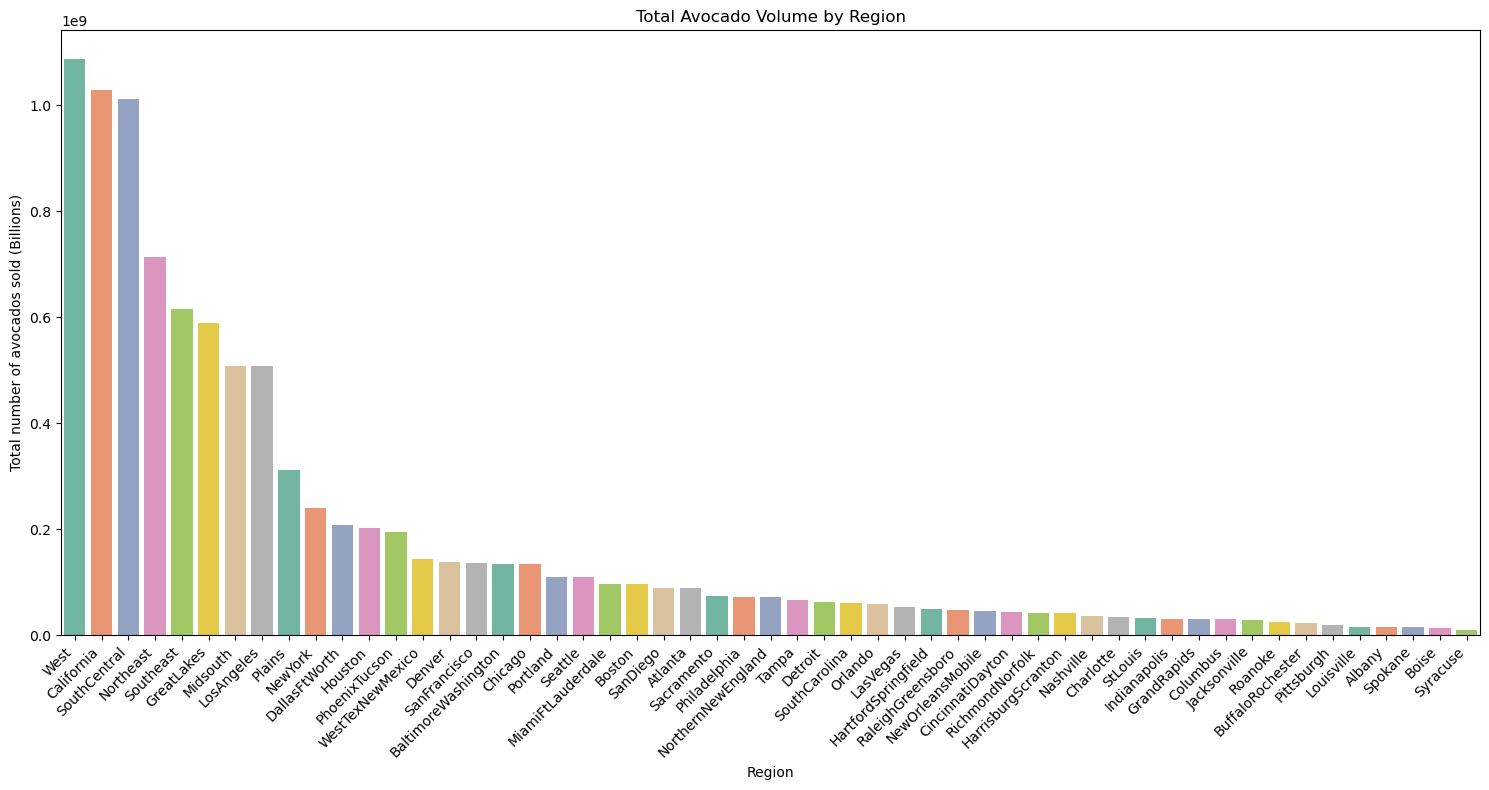

In [22]:
# Load your data
avocado_df = pd.read_csv('avocado.csv')

# Filter out 'TotalUS' region
filtered_df = avocado_df[avocado_df['region'] != 'TotalUS']

# Aggregate total volume by region
region_volume = filtered_df.groupby('region')['Total Volume'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=[15,8])
sns.barplot(x='region', y='Total Volume', data=region_volume, order=region_volume.sort_values('Total Volume', ascending=False)['region'], palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Total Avocado Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total number of avocados sold (Billions)')

# Adjust layout to fit labels
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig('avocado_volume_by_region.png', bbox_inches='tight')

# Show the plot
plt.show()

This bar chart visualizes the total volume of avocados sold across different regions. The regions represent a mix of individual cities, broader metropolitan areas, and larger state or multi-state regions. This setup allows for a visual comparison of avocado sales across distinct geographic categories. The West, California, and SouthCentral regions have the highest avocado sales, far surpassing other areas. This indicates that these large, avocado-producing and consuming regions drive a significant portion of overall avocado sales. Los Angeles, being part of California, also stands out as a major contributor, reflecting the high demand in the region. Major metropolitan areas such as New York, BaltimoreWashington, and PhoenixTucson also see significant sales volumes. These urban centers likely have high consumption rates due to their large populations and the popularity of avocados in modern diets. 
The clear distinction between high-volume and low-volume areas helps pinpoint where avocado demand is strongest, while also providing insight into consumption patterns across diverse regions of the country.
It's also a good idea to compare sales across different years. Let's plot the volume of avocados sold by year:

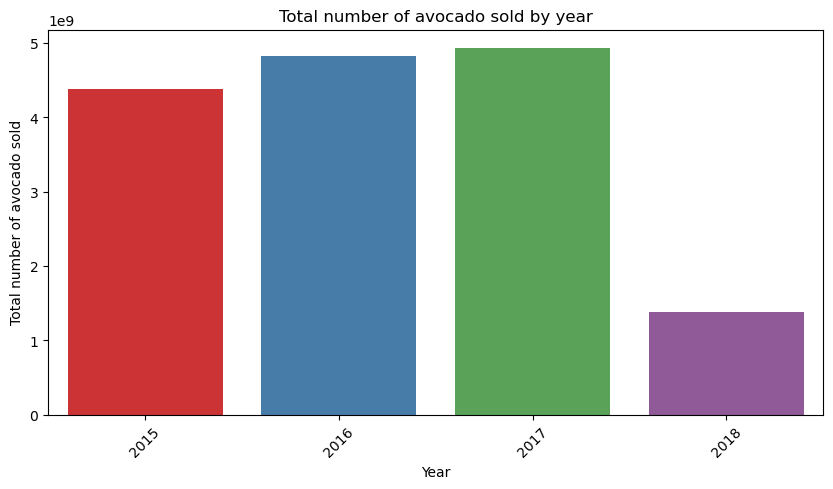

In [8]:
# Aggregate the data by year and sum the total volume
year_volume = avocado_df.groupby('year')['Total Volume'].sum().reset_index()

# Create the bar chart for total volume by year
plt.figure(figsize=[10,5])
sns.barplot(x='year', y='Total Volume', data=year_volume, palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Total number of avocado sold by year')
plt.xlabel('Year')
plt.ylabel('Total number of avocado sold')

# Save the plot to a PNG file
plt.savefig('sales_per_year.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

The distribution of avocado sales per year shows a steady increase from 2015 to 2017, reflecting a consistent upward trend in avocado consumption. The data for 2018 is incomplete, so it's difficult to draw any solid conclusions for that year.

### 5. Prepare Data for Prophet

The next code creates a new DataFrame avocado_prophet_df containing only the Date and AveragePrice columns from the original data. This filtered dataset will be used as input for forecasting avocado prices using the Prophet model.

In [9]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 
avocado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


I need to rename columns to 'y' and 'ds'. These specific column names are required by the Prophet model, where ds represents the date and y is the target variable to forecast.

In [10]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


## 6. Initialize and Fit the Prophet Model

In this section of the code, I initialize a Prophet model and fit the model to my prepared dataset. This step allows the Prophet model to learn the underlying trends and seasonality in avocado prices over time, which will later enable us to make accurate forecasts based on this historical data.

In [11]:
model = Prophet()
model.fit(avocado_prophet_df)

13:33:27 - cmdstanpy - INFO - Chain [1] start processing
13:33:30 - cmdstanpy - INFO - Chain [1] done processing


## 7. Forecast Future Prices

Next step is a preparing to forecast avocado prices into the future. First, I create a DataFrame with future dates for the next 365 days. Then, I use the trained Prophet model to generate predictions for this future period. This will allow us to see projected avocado prices and their associated uncertainties for the upcoming year.

In [12]:
# Forcasting into the future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Display the first 5 rows of the DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500593,0.924631,1.902776,1.500593,1.500593,-0.114694,-0.114694,-0.114694,-0.114694,-0.114694,-0.114694,0.0,0.0,0.0,1.385899
1,2015-01-11,1.495324,0.886753,1.843782,1.495324,1.495324,-0.106438,-0.106438,-0.106438,-0.106438,-0.106438,-0.106438,0.0,0.0,0.0,1.388886
2,2015-01-18,1.490056,0.875610,1.863922,1.490056,1.490056,-0.106199,-0.106199,-0.106199,-0.106199,-0.106199,-0.106199,0.0,0.0,0.0,1.383856
3,2015-01-25,1.484787,0.858134,1.836508,1.484787,1.484787,-0.125177,-0.125177,-0.125177,-0.125177,-0.125177,-0.125177,0.0,0.0,0.0,1.359609
4,2015-02-01,1.479518,0.847575,1.831866,1.479518,1.479518,-0.153539,-0.153539,-0.153539,-0.153539,-0.153539,-0.153539,0.0,0.0,0.0,1.325979


Let's visualize the forecasted avocado prices. I generate a plot that shows the historical data along with the future price predictions made by the Prophet model. This visualization helps to assess how the avocado prices are expected to trend over the forecast period.

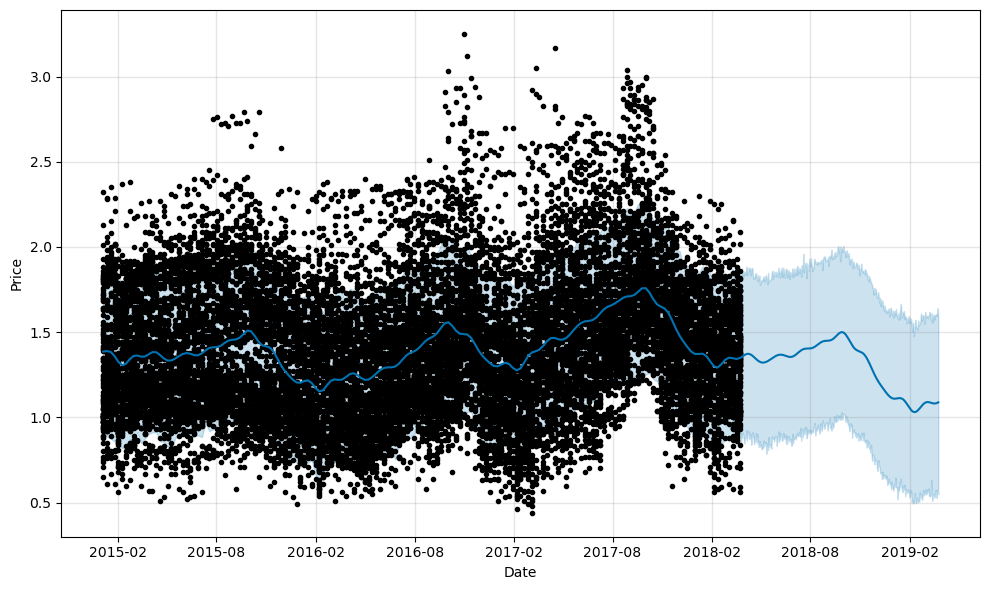

In [13]:
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

The forecast plot reveals that the model predicts a peak in avocado prices at the beginning of autumn and a trough in January. This suggests that the model anticipates recurring seasonal trends, mirroring the patterns observed in the historical data. The forecast aligns with past behavior, indicating that price fluctuations are likely to follow similar seasonal cycles in the future.

In the next part of the code, I create a new plot, which separates the forecast into its main components: the overall trend, seasonal patterns, and any special effects such as holidays. By examining these components, we can better understand the factors influencing the avocado price predictions, including how trends and seasonal variations contribute to the forecasted values.

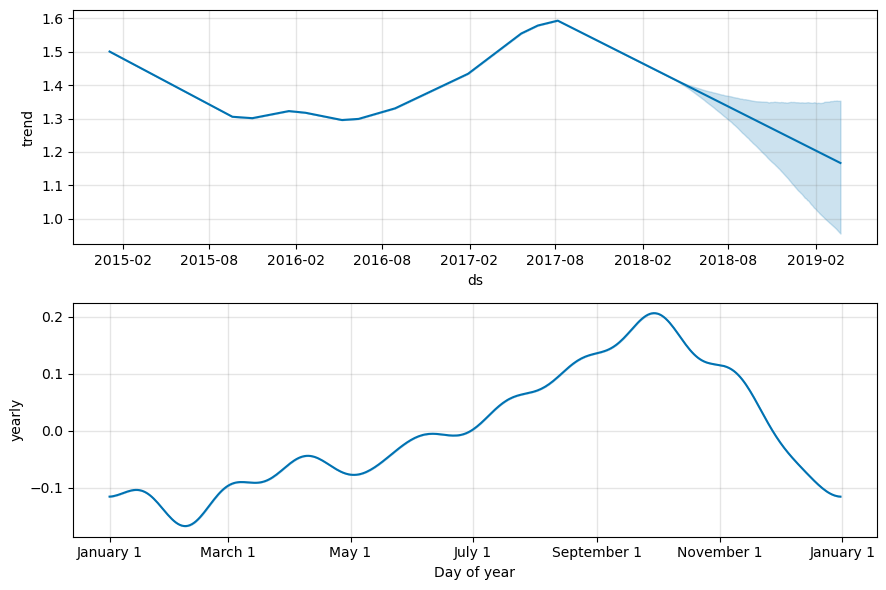

In [14]:
figure3 = model.plot_components(forecast)

What do these plots show:
Trend Component: This plot shows the overall direction of avocado prices over time. It highlights the long-term trends, indicating whether prices are generally increasing or decreasing.

Yearly Seasonality Component: This plot illustrates the recurring seasonal patterns within a year. It reveals how avocado prices tend to fluctuate at different times of the year, capturing annual trends such as peaks and troughs related to specific months or seasons.

The components plot reveals that avocado prices exhibit a clear upward trend over time, indicating a general increase in prices. Additionally, the yearly seasonality plot shows regular annual fluctuations, with specific months experiencing predictable peaks and troughs, highlighting the seasonal nature of avocado pricing.

## 8. Forecast Future Prices in one of the region

Out of curiosity, I will now focus on forecasting avocado prices specifically for the state of California. The code provided above details this process. Let’s explore the resulting visualizations to gain insights into the price trends.

In [15]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')
avocado_df_sample = avocado_df[avocado_df['region']=='California']
avocado_df_sample = avocado_df_sample.sort_values("Date")

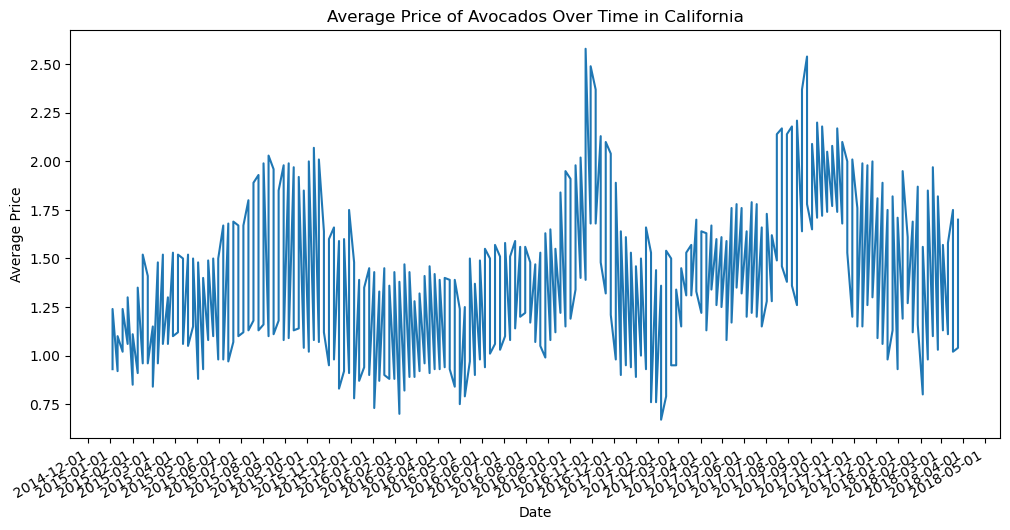

In [16]:
# Convert 'Date' column to datetime
avocado_df_sample['Date'] = pd.to_datetime(avocado_df_sample['Date'])
plt.figure(figsize=(12,6))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])
# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  


# Rotate and format the x-axis labels
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados Over Time in California')

# Show the plot
plt.show()

In [17]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [18]:
model = Prophet()
model.fit(avocado_df_sample)
# Forcasting into the future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

13:33:33 - cmdstanpy - INFO - Chain [1] start processing
13:33:33 - cmdstanpy - INFO - Chain [1] done processing


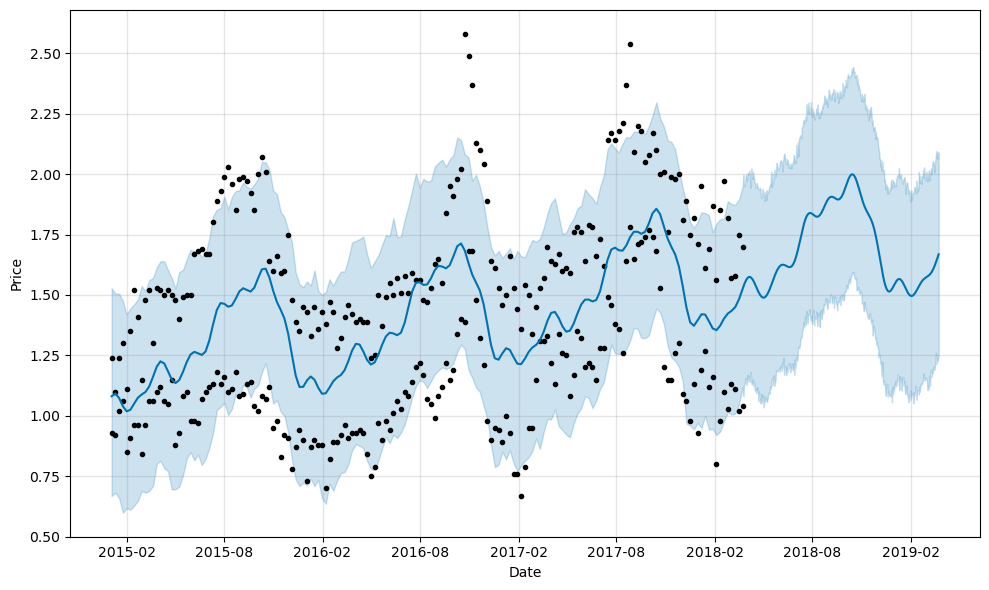

In [19]:
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

The forecast plot shows that avocado prices in California are expected to follow existing trends while rising over the next 365 days, indicating a potential increase in prices.

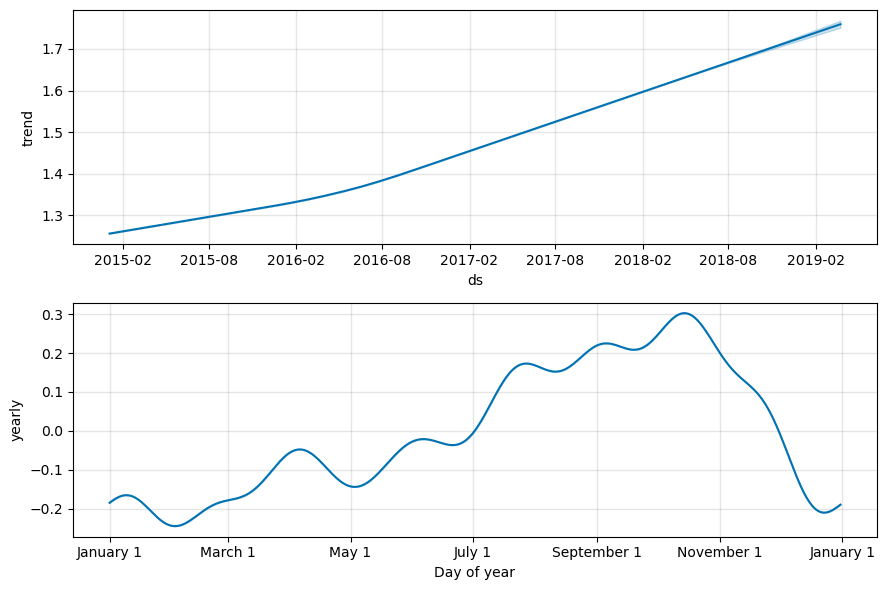

In [20]:
figure3 = model.plot_components(forecast)

## Conclusion

This project involved forecasting avocado prices using Facebook's Prophet model to understand price trends and predict future prices. By leveraging historical data, I analyzed patterns and seasonal effects, leading to the generation of forecasts for the next year. The findings indicated clear seasonal trends in avocado prices, with peaks and troughs aligning with expected seasonal patterns. The forecast plots revealed that avocado prices are likely to follow a similar trajectory in the future, with peaks in autumn and troughs in January.

This analysis demonstrates the utility of Prophet in time series forecasting, providing valuable insights for stakeholders in the avocado supply chain. By understanding these trends, retailers and other stakeholders can make more informed decisions regarding inventory and pricing strategies.

Overall, working with Prophet to forecast avocado prices has been for me a valuable experience in applying time series analysis techniques to real-world data, offering practical benefits and deepening the understanding of seasonal trends in commodity pricing.